In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class M1890():
    def __init__(self):
        self.thrust          = [0.0, 63.45, 359.96, 580.32, 763.76, 1020.27, 1255.24, 1439.45, 1570.59, 1651.35, 1679.42, 1949.78, 1946.7, 1985.16, 2014.0, 2106.3, 2056.3, 2078.22, 2094.76, 2123.99, 2126.68, 2129.75, 2162.44, 2187.44, 2198.59, 2226.67, 2240.13, 2233.59, 2224.36, 2226.28, 2226.28, 2197.44, 2207.44, 2176.29, 2168.21, 2123.6, 2063.99, 2030.15, 1908.63, 1834.02, 1765.18, 1701.73, 1619.43, 1571.74, 1505.21, 1517.13, 1477.14, 1212.94, 624.16, 266.89, 94.99, 0.0]
        self.thrustTimeStamp = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.365]
        
    def thrustProfile(self, time):
        if (time > max(self.thrustTimeStamp) or time == 0):
            return 0
        matchedIndex = 0
        match = False
        for index, i in enumerate(self.thrustTimeStamp):
            if (time < i):
                if time == i:
                    match = True
                matchedIndex = index
                break
        if match:
            return self.thrust[matchedIndex]
        
        per = (time - self.thrustTimeStamp[matchedIndex-1]) / (self.thrustTimeStamp[matchedIndex] - self.thrustTimeStamp[matchedIndex-1])
        return self.thrust[matchedIndex-1] + (per * (self.thrust[matchedIndex]- self.thrust[matchedIndex-1]))
        

In [3]:
class N1800():
    def __init__(self):
        self.thrust          = [1769.444, 2205.556, 2041.667, 1988.889, 1994.444, 2144.444, 2119.444, 2077.778, 1786.111, 1525.0, 1444.444, 1352.778, 1261.111, 994.444, 738.889, 622.222, 355.556, 75.0, 0.0]
        self.thrustTimeStamp = [0.077, 0.123, 0.193, 0.339, 0.744, 2.398, 2.726, 2.977, 3.933, 4.643, 4.986, 5.152, 5.225, 5.348, 5.437, 5.541, 5.73, 5.915, 5.931]
        
    def thrustProfile(self, time):
        if (time > max(self.thrustTimeStamp) or time <= 0):
            return 0
        matchedIndex = 0
        match = False
        for index, i in enumerate(self.thrustTimeStamp):
            if (time < i):
                if time == i:
                    print("A point")
                    match = True
                matchedIndex = index
                break
        if match:
            return self.thrust[matchedIndex]
        
        per = (time - self.thrustTimeStamp[matchedIndex-1]) / (self.thrustTimeStamp[matchedIndex] - self.thrustTimeStamp[matchedIndex-1])
        return self.thrust[matchedIndex-1] + (per * (self.thrust[matchedIndex]- self.thrust[matchedIndex-1]))



In [4]:
class Rocket_Data():
    def __init__(self):
        self.drag_SA     = 0.1
        self.dragg = np.array([0])
        self.rocketmass   = 26.67123 # Kg
        self.timeStamp    = np.array([0])
        self.altitude     = np.array([0])
        self.velocity     = np.array([0])
        self.recAcc       = np.array([-9.81])
        self.acceleration = 0
        self.altitude_Air_Density = np.array([(0,1.225),(1000,1.112),(2000,1.007),(3000,0.9093),(4000,0.8194),(5000,0.7364),(6000,0.6601),(7000,0.5900),(8000,0.5258)])
        
    def openAirBreaks(self, per): # Pass percentage ie 0.0-1.0
        self.drag_SA = 0.1 + (per * 0.1)
        
    def noise(self, avg, std):
        return np.random.normal(avg, std, size=(1))[0]
    
    def drag(self, altk_1, veck_1):
        air_density = 0
        for i in range(len(self.altitude_Air_Density)):
            if (altk_1 < self.altitude_Air_Density[i][0]):
                per = (altk_1 - self.altitude_Air_Density[i-1][0]) / (self.altitude_Air_Density[i][0] - self.altitude_Air_Density[i-1][0])
                air_density = self.altitude_Air_Density[i-1][1] +  (per * (self.altitude_Air_Density[i][1] - self.altitude_Air_Density[i-1][1]))
                break
        drag_coeff = 0.18
        return ((veck_1*veck_1) * drag_coeff * air_density * self.drag_SA) / 2
        
        
    def update_Attributes(self, timeStampk): # TimeStampk: k
        
        delta_T       = timeStampk - self.timeStamp[-1]
        current_velocity = self.velocity[-1] + (self.acceleration * delta_T) + self.noise(0,.2) #Noise 
        current_altitude = self.altitude[-1] + (current_velocity  * delta_T)
        
        
        self.timeStamp   = np.append(self.timeStamp, timeStampk)
        
        if current_altitude < 0:
            self.altitude = np.append(self.altitude, 0)
            self.velocity = np.append(self.velocity, 0)
        else:
            self.altitude = np.append(self.altitude, current_altitude)
            self.velocity = np.append(self.velocity, current_velocity)
        
        
    def update_Thrust(self, thrust, timeStampk):
        current_drag      = self.drag(self.altitude[-1], self.velocity[-1])
        self.dragg = np.append(self.dragg,[current_drag/self.rocketmass])
        
        self.acceleration = ((thrust - current_drag) / self.rocketmass) - 9.8
        self.update_Attributes(timeStampk)
        
        self.recAcc = np.append(self.recAcc, self.acceleration)
    
    def get_GPS_Alt(self, time):
        return self.rocket_Handler.altitude[-1] + self.normal(0, 60) - 0.5
    
    def get_Bar_Alt(self, time):
        return self.rocket_Handler.altitude[-1] + self.normal(0, 10)
        
    def normal(self, avg, std):
        return np.random.normal(avg, std, size=(1))[0]
    
    def plot_Attributes(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(self.timeStamp, self.altitude,
                label='ADA_II',color='red')
        plt.plot(self.timeStamp[np.argmax(self.altitude)], max(self.altitude), marker="o", markersize=3, markeredgecolor="red", markerfacecolor="green")
        plt.xlabel("TimeStamp")
        plt.ylabel("Altitude")
        ax.legend()
        print("Max Altitude: "+str(max(self.altitude)))
        
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(self.timeStamp, self.velocity,
                label='ADA_II',color='red')
        plt.xlabel("TimeStamp")
        plt.ylabel("Velocity")
        ax.legend()
        print("Max Velocity: "+str(max(self.velocity)))
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(self.timeStamp, self.recAcc,
                label='ADA_II',color='red')
        plt.xlabel("TimeStamp")
        plt.ylabel("Acceleration")
        ax.legend()
        print("Max Acceleration: "+str(max(self.recAcc)))
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(self.timeStamp, self.dragg,
                label='ADA_II',color='red')
        plt.xlabel("TimeStamp")
        plt.ylabel("Drag")
        ax.legend()
        print("Max Velocity: "+str(max(self.velocity)))
    
        

In [5]:
rocket = Rocket_Data()

In [6]:
class Sensor_Handler():
    def __init__(self):
        self.rocket_Handler = Rocket_Data()
        self.engine_Handler = N1800()
        i = 0.0
        while i < 50:
            self.rocket_Handler.update_Thrust(self.engine_Handler.thrustProfile(i), i)
            i += 0.001
    
    def get_GPS_Alt(self, time):
        for index, i in enumerate(self.rocket_Handler.timeStamp):
            if time < i:
                print(self.rocket_Handler.altitude[index])
                return self.rocket_Handler.altitude[index] + self.normal(0, 60)
        return 0
    def get_Bar_Alt(self, time):
        for index, i in enumerate(self.rocket_Handler.timeStamp):
            if time < i:
                print(self.rocket_Handler.altitude[index])
                return self.rocket_Handler.altitude[index] + self.normal(0, 10)
        return 0
        
    def normal(self, avg, std):
        return np.random.normal(avg, std, size=(1))[0]
    
# sensorData = Sensor_Handler()

Max Altitude: 1457.2914836382395
Max Velocity: 219.15524263670193
Max Acceleration: 72.24542490692417
Max Velocity: 219.15524263670193


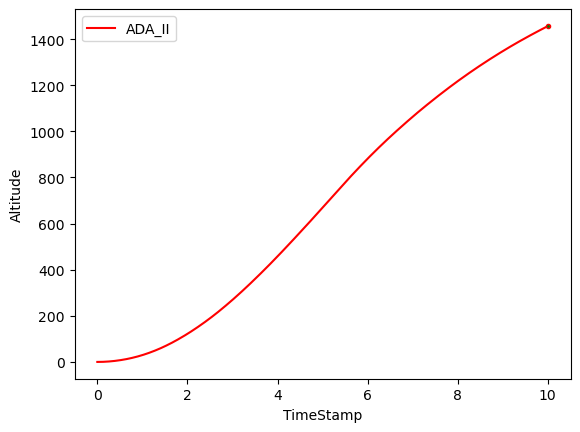

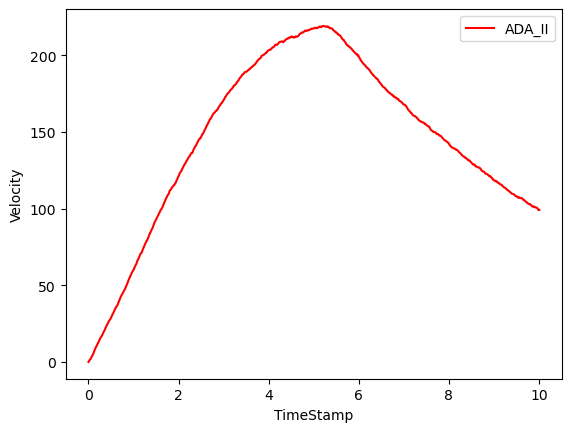

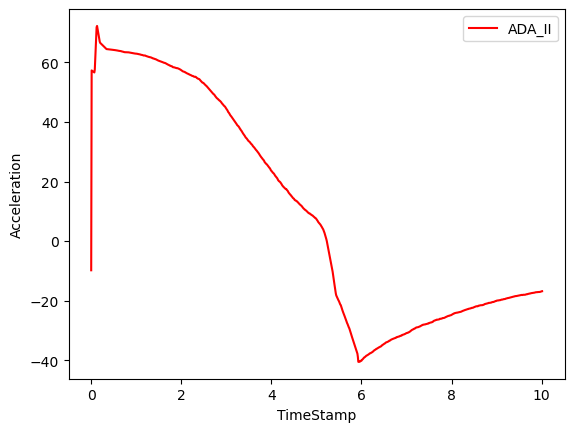

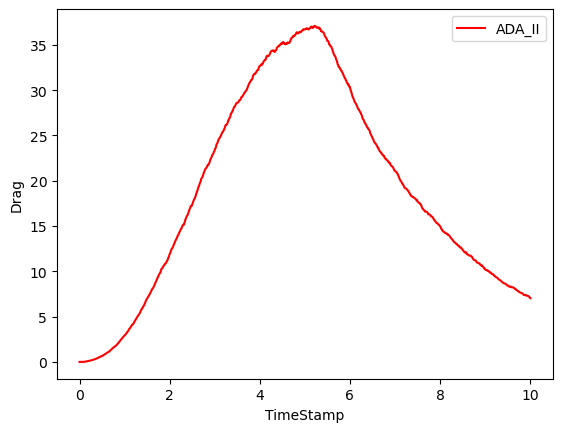

In [17]:
rocket = Rocket_Data()
engine = N1800()#M1890()

x = []
yg = []
yb = []
i = 0
while i < 10:
    i += 0.01
    rocket.update_Thrust(engine.thrustProfile(i), i)
#     rocket.openAirBreaks(1)
#     x.append(i)
#     yg.append(rocket.)
rocket.plot_Attributes()


## PID Implementation:

Your goal is to implement a PID system to change the amount of drag added to the system via the air breaks. Above you can see an example of GPS data begin collected via the GPS sensor. You can also read from the get_Bar_Alt function. For this week because we have not finished covering the Kalman filter stuff just read from one of the sensors. Try out different configurations drag and stuff. Feel free to change the code and see how it changes the system.

In [8]:
class PID():
    def __init__(self, p, i, d):
        self.pk = p
        self.ik = i
        self.dk = d
        self.integral = 0
        self.k_1 = 0
    
    def inte(self, err, timeStamp):
        self.integral += err * timeStamp
        return self.ik * self.integral
    
    def dif(self, err, timeStamp):
        returnVal = (err - self.k_1) / timeStamp
        self.k_1 = err
        return returnVal * self.dk
    
    def propo(self, err, timeStamp):
        return err * self.pk
    
    def update(self, goal, amp, timeStamp):
        error = goal - amp
        return self.inte(error, timeStamp) + self.dif(error, timeStamp) + self.propo(error, timeStamp)


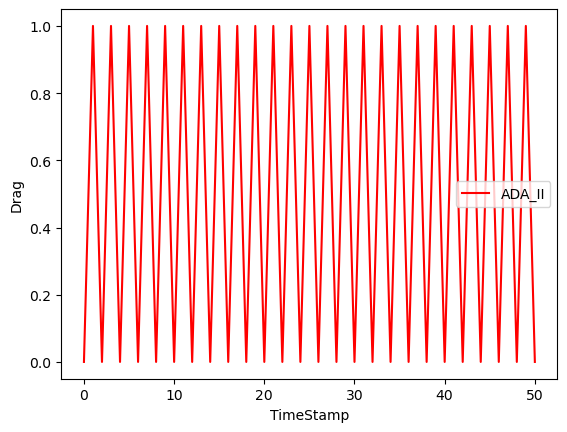

In [9]:
# print(sensorData.get_GPS_Alt(5))
# rocket.update_Thrust(engine.thrustProfile(i), i)
# rocket.plot_Attributes()

pid = PID(1 ,0, 0)
lis = []
PIDVal = 0
i = 0.0
Dt = 0.1
while i < 5:
    i += Dt
    lis.append(PIDVal)
    PIDVal = pid.update(1, PIDVal, Dt)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lis,label='ADA_II',color='red')
plt.xlabel("TimeStamp")
plt.ylabel("Drag")
ax.legend()